In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [259]:
def get_beta_pdfs(a, b, resolution=101):
    rv = stats.beta(a, b)
    xs = np.linspace(0, 1, resolution)
    pdfs = pd.Series(rv.pdf(xs) / xs.shape[0], index=xs)
    return pdfs

def get_binom_pmfs(n, k, ps):
    return pd.Series(stats.binom(n, ps).pmf(k), index=ps)

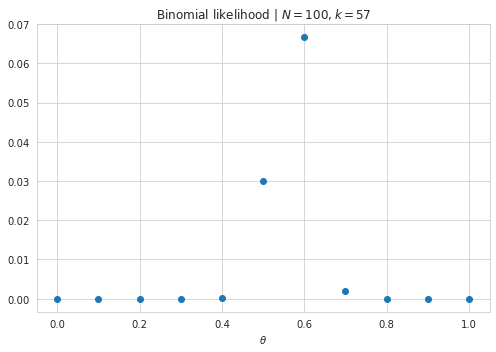

In [26]:
def binom_likelihood(n, k, theta):
    return stats.binom(n, theta).pmf(k)

thetas = np.arange(0, 1.1, 0.1)
pmfs = [binom_likelihood(100, 57, theta) for theta in thetas]

fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(thetas, pmfs)

ax.set_xlabel(r'$\theta$')
ax.set_title('Binomial likelihood | $N = 100, k = 57$')

fig.tight_layout()
fig.show()

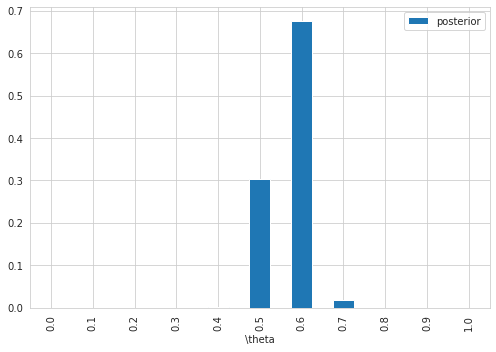

In [50]:
thetas = np.arange(0, 1.1, 0.1)
priors = np.ones(11) * (1/11)
likelihoods = np.array([binom_likelihood(100, 57, theta) for theta in thetas])

fig, ax = plt.subplots(figsize=(7, 5))
pd.DataFrame({
    'thetas': np.round(thetas, 2),
    'posterior': (likelihoods * priors) / sum(likelihoods * priors),
}).set_index('thetas').plot(kind='bar', ax=ax)
ax.set_xlabel(r"$\theta$")

fig.tight_layout()
fig.show()

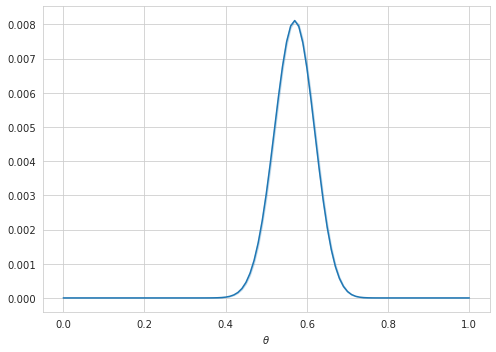

In [74]:
thetas = np.linspace(0, 1, 1000)
theta_priors = np.ones(thetas.shape)

likelihoods = np.array([binom_likelihood(100, 57, theta) for theta in thetas])

to_plot = pd.DataFrame({
    'thetas': np.round(thetas, 2),
    'posterior': (likelihoods * theta_priors) / sum(likelihoods * theta_priors),
})

fig, ax = plt.subplots(figsize=(7, 5))
sns.lineplot(x=to_plot.thetas, y=to_plot.posterior, ax=ax)

ax.set_xlabel(r"$\theta$")
ax.set_ylabel("")

fig.tight_layout()
fig.show()

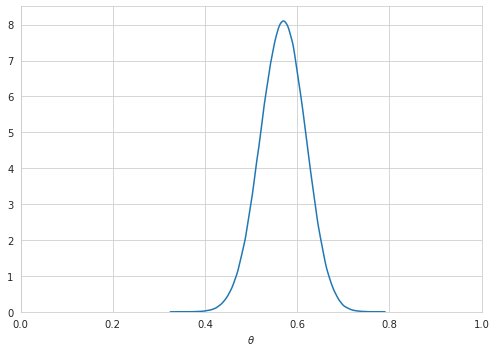

In [78]:
beta_post = stats.beta(1+57, 1+100-57).rvs(1000000)

fig, ax = plt.subplots(figsize=(7, 5))
sns.kdeplot(beta_post, ax=ax)
ax.set_xlim(0, 1)
ax.set_xlabel(r"$\theta$")
ax.set_ylabel("")

fig.tight_layout()
fig.show()

In [113]:
from itertools import product

n0 = np.arange(1, 33, 1)
theta0 = np.linspace(0.1, 0.9, 100)

In [216]:
parameters = []
N = 100
k = 57
for (n, theta) in product(n0, theta0):
    a = theta * n
    b = n - a
    post = stats.beta(a + k, b + N - k)
    prob_gt_50 = 1 - post.cdf(0.5)

    parameters.append({
        'n0': n,
        'theta0': theta,
        'prob_gt_50': prob_gt_50
    })

In [197]:
prior = get_beta_pdfs(1, 1)
likelihoods = get_binom_pmfs(N, k, prior.index.values) * prior
post = likelihoods / likelihoods.sum()

<AxesSubplot:>

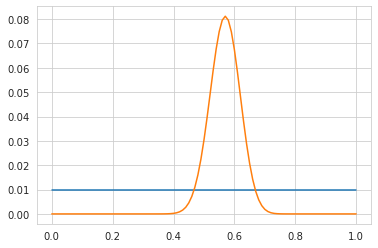

In [198]:
prior.plot()
post.plot()

In [218]:
df = pd.DataFrame(parameters)

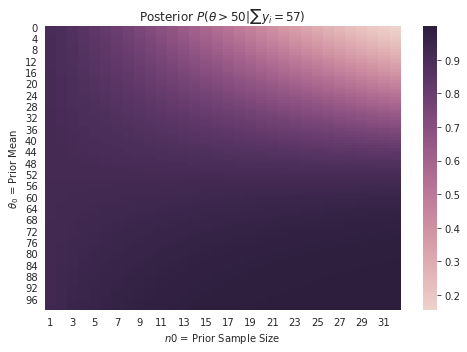

In [258]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.heatmap(
    df.set_index(['n0','theta0']).unstack().T.droplevel(0),
    ax=ax, cmap=sns.cubehelix_palette(as_cmap=True)
)
ax.yaxis.set_major_formatter('{x:0.0f}')
ax.set_xlabel('$n0$ = Prior Sample Size')
ax.set_ylabel('$\\theta_0$ = Prior Mean')
ax.set_title('Posterior $P(\\theta>50|\\sum y_i=57)$')

fig.tight_layout()
fig.show()

mode 0.31
mean 0.32246317083039855
SD 0.06506075511234517
CI 0.2 0.45


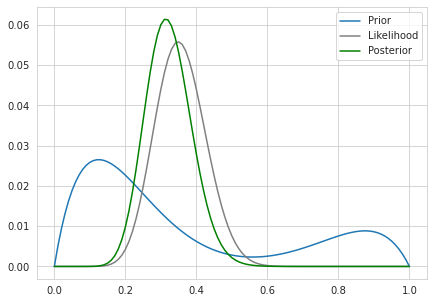

In [335]:
prior_1 = get_beta_pdfs(2, 8)
prior_2 = get_beta_pdfs(8, 2)
prior = (prior_1 * 0.75 + prior_2 * 0.25)
prior = prior / prior.sum()

likelihoods = get_binom_pmfs(43, 15, prior.index.values)
post = (likelihoods * prior) / (likelihoods * prior).sum()

fig, ax = plt.subplots(figsize=(7, 5))

prior.plot(label='Prior', ax=ax)
(likelihoods / likelihoods.sum()).plot(label='Likelihood', ax=ax, color='grey')
post.plot(label='Posterior', ax=ax, color='green')

ax.legend()
fig.show()

mu = (post.index.values * post.values).sum()
print('mode', post.idxmax())
print('mean', mu)
print('SD', np.sqrt((post.index.values**2 * post.values).sum() - mu**2))

cdf = post.cumsum()
ci = post[(cdf < 0.975) & (cdf > 0.025)]
print('CI', ci.index[0], ci.index[-1])

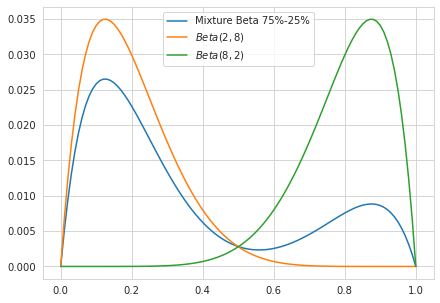

In [341]:
fig, ax = plt.subplots(figsize=(7, 5))

prior_1 = get_beta_pdfs(2, 8)
prior_2 = get_beta_pdfs(8, 2)
prior = (prior_1 * 0.75 + prior_2 * 0.25)
prior = prior / prior.sum()

prior.plot(ax=ax, label='Mixture Beta 75%-25%')
prior_1.plot(ax=ax, label='$Beta(2, 8)$')
prior_2.plot(ax=ax, label='$Beta(8, 2)$')

ax.legend()

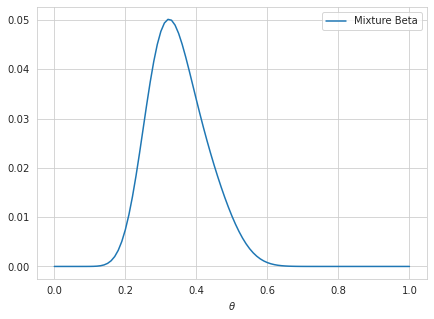

In [348]:
fig, ax = plt.subplots(figsize=(7, 5))

prior_1 = get_beta_pdfs(17, 36)
prior_2 = get_beta_pdfs(23, 30)
prior = (prior_1 * 0.75 + prior_2 * 0.25)
prior = prior / prior.sum()

prior.plot(ax=ax, label='Mixture Beta')
ax.set_xlabel('$\\theta$')

ax.legend()
fig.show()

In [349]:
prior.idxmax()

0.32

mode 0.13
mean 0.1764710485567902
SD 0.08985391855776965
CI 0.04 0.37


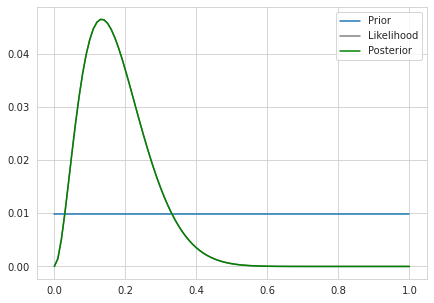

In [352]:
prior = get_beta_pdfs(1, 1)

likelihoods = get_binom_pmfs(15, 2, prior.index.values)
post = (likelihoods * prior) / (likelihoods * prior).sum()

fig, ax = plt.subplots(figsize=(7, 5))

prior.plot(label='Prior', ax=ax)
(likelihoods / likelihoods.sum()).plot(label='Likelihood', ax=ax, color='grey')
post.plot(label='Posterior', ax=ax, color='green')

ax.legend()
fig.show()

mu = (post.index.values * post.values).sum()
print('mode', post.idxmax())
print('mean', mu)
print('SD', np.sqrt((post.index.values**2 * post.values).sum() - mu**2))

cdf = post.cumsum()
ci = post[(cdf < 0.975) & (cdf > 0.025)]
print('CI', ci.index[0], ci.index[-1])

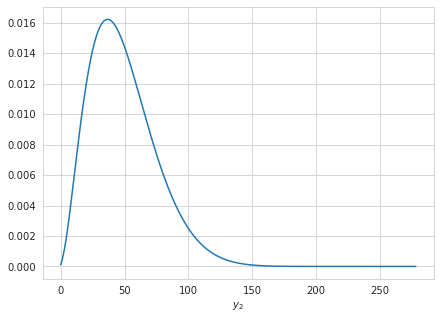

mode 37
mean 49.05895149878768
SD 25.731825889763947


In [429]:
ks = np.arange(0, 278+1)
jointed = stats.binom(278, post.index.values.reshape(-1,1)).pmf(ks) * post.values.reshape(-1,1)
post_pred = pd.Series(jointed.sum(0), index = ks)

ax = post_pred.plot(figsize=(7, 5))
ax.set_xlabel('$y_2$')
plt.show()

mu = (post_pred.index.values * post_pred.values).sum()
print('mode', post_pred.idxmax())
print('mean', mu)
print('SD', np.sqrt((post_pred.index.values**2 * post_pred.values).sum() - mu**2))

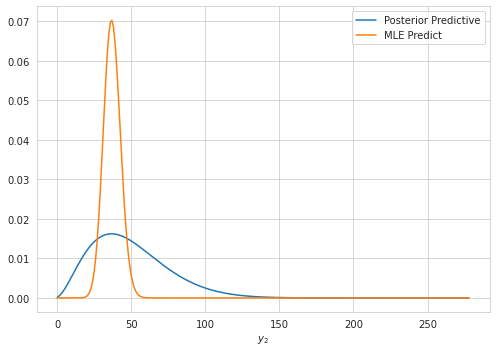

In [443]:
N = 278
theta_mle = 2/15
ks = np.arange(0, 279)
pred = pd.Series(stats.binom(N, theta_mle).pmf(ks), index=ks)

fig, ax = plt.subplots(figsize=(7, 5))

post_pred.plot(label='Posterior Predictive', ax=ax)
pred.plot(label='MLE Predict', ax=ax)

ax.set_xlabel("$y_2$")
ax.legend()

fig.tight_layout()
fig.show()

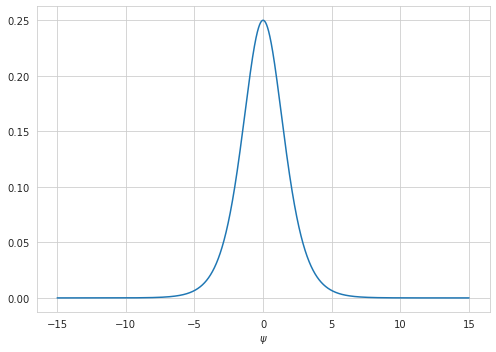

In [462]:
from scipy.special import beta

psi = np.linspace(-15, 15, num=100000)
gamma = 1/(1+np.exp(psi))
a, b = 1, 1

post = pd.Series(1/beta(a, b)*((1-gamma)**a)*(gamma**b), index=psi)

fig, ax = plt.subplots(figsize=(7, 5))
post.plot(ax=ax)
ax.set_xlabel("$\psi$")
fig.tight_layout()
fig.show()

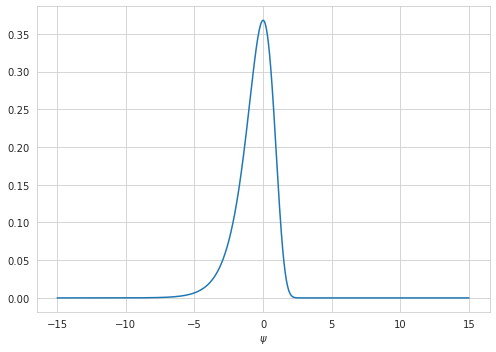

In [463]:
from scipy.special import gamma

psi = np.linspace(-15, 15, num=100000)
theta = np.exp(psi)
a, b = 1, 1

post = pd.Series((b**a)/gamma(a) * np.exp(a*psi) * np.exp(-b*np.exp(psi)), index=psi)

fig, ax = plt.subplots(figsize=(7, 5))
post.plot(ax=ax)
ax.set_xlabel("$\psi$")
fig.tight_layout()
fig.show()